In [1]:
import pandas as pd

# Define the paths to your dataset files
accident_file = "kaggle_data/accident_data.csv"
vehicle_accident_file = "kaggle_data/vehicle_data.csv"

# Step 1: Load the accident data with specified encoding
df_accident = pd.read_csv(accident_file, encoding='latin1')  

# Step 2: Load the vehicle accident data with specified encoding
df_vehicle = pd.read_csv(vehicle_accident_file, encoding='latin1')  

# Step 3: Inspect the columns to identify a common primary key
print("Accident Columns:", df_accident.columns)
print("Vehicle Accident Columns:", df_vehicle.columns)

# Step 4: Remove filtering by year, keep all data
df_accident['Date'] = pd.to_datetime(df_accident['Date'], errors='coerce')

# Step 5: Merge the accident data with vehicle data on 'Accident_Index'
common_key = 'Accident_Index'
common_keys = pd.merge(df_accident, df_vehicle, on=common_key, how='inner')

# Step 6: Display results
print(f"Number of matching keys: {len(common_keys)}")
print("Sample of merged data:")
print(common_keys.head())

# Step 7: Optionally, save the merged data for further use
common_keys.to_csv("merged_accident_vehicle_records.csv", index=False)
print("Merged data saved to 'merged_accident_vehicle_records.csv'")


Accident Columns: Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object')
Vehicle Accident Columns: Index(['Accident_Index', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Driver_IMD_Decile', 

In [2]:
# Step 7: Select the desired columns from the merged dataset
columns_to_keep = [
    'Accident_Severity', 
    'Did_Police_Officer_Attend_Scene_of_Accident', 
    'Speed_limit', 
    'Time', 
    'Weather_Conditions', 
    'Road_Surface_Conditions', 
    'Engine_Capacity_.CC.', 
    'make',
    'model',
    'Date',
    'Day_of_Week', 
    'Sex_of_Driver', 
    'Journey_Purpose_of_Driver', 
    'Junction_Location', 
    'Age_Band_of_Driver', 
    'Age_of_Vehicle', 
    'Number_of_Casualties', 
    'Number_of_Vehicles'
]

# Filter the DataFrame to retain only the desired columns
common_keys_cleaned = common_keys[columns_to_keep]

# Step 8: Display the cleaned data
print("Cleaned data with selected columns:")
print(f"Number of data on the cleaned data: {len(common_keys_cleaned)}")
print(common_keys_cleaned.head())

# Step 9: Save the cleaned data to a new file
cleaned_file = "cleaned_common_accident_vehicle_records.csv"
common_keys_cleaned.to_csv(cleaned_file, index=False)
print(f"Cleaned merged data saved to '{cleaned_file}'")



Cleaned data with selected columns:
Number of data on the cleaned data: 528335
  Accident_Severity  Did_Police_Officer_Attend_Scene_of_Accident  Speed_limit  \
0            Slight                                          1.0           30   
1            Slight                                          1.0           30   
2            Slight                                          1.0           30   
3            Slight                                          1.0           30   
4            Slight                                          1.0           30   

    Time     Weather_Conditions Road_Surface_Conditions  Engine_Capacity_.CC.  \
0  17:36     Fine no high winds                     Dry                8268.0   
1  00:15     Fine no high winds                     Dry                8300.0   
2  10:35     Fine no high winds                     Dry                1769.0   
3  21:13     Fine no high winds             Wet or damp                  85.0   
4  12:40  Raining no high win

Checking for missing values:
Accident_Severity                 0
Sex_of_Driver                     0
Age_Band_of_Driver                0
Journey_Purpose_of_Driver         0
Day_of_Week                       0
Date                         317748
Time                              2
dtype: int64

Missing values after dropping:
Accident_Severity            0
Sex_of_Driver                0
Age_Band_of_Driver           0
Journey_Purpose_of_Driver    0
Day_of_Week                  0
Date                         0
Time                         0
dtype: int64


C:\Users\acer\AppData\Local\Temp\ipykernel_18912\3786894571.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographics_data.dropna(inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_18912\3786894571.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographics_data['Sex_of_Driver'] = demographics_data['Sex_of_Driver'].map({'Male': 0, 'Female': 1})
C:\Users\acer\AppData\Local\Temp\ipykernel_18912\3786894571.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v


Processed driver demographics data saved to 'driver_demographics_processed.csv'


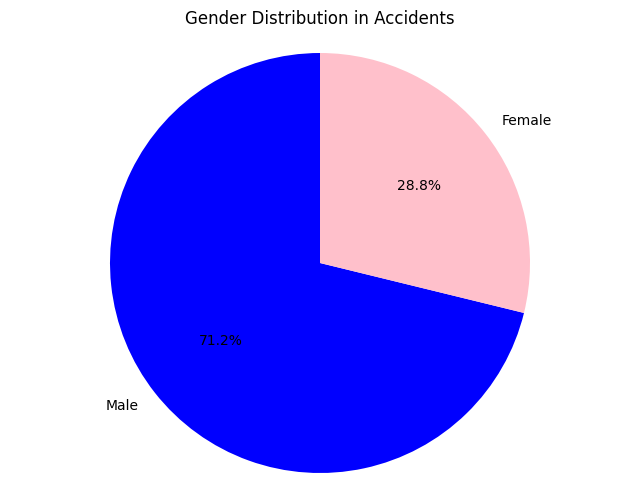

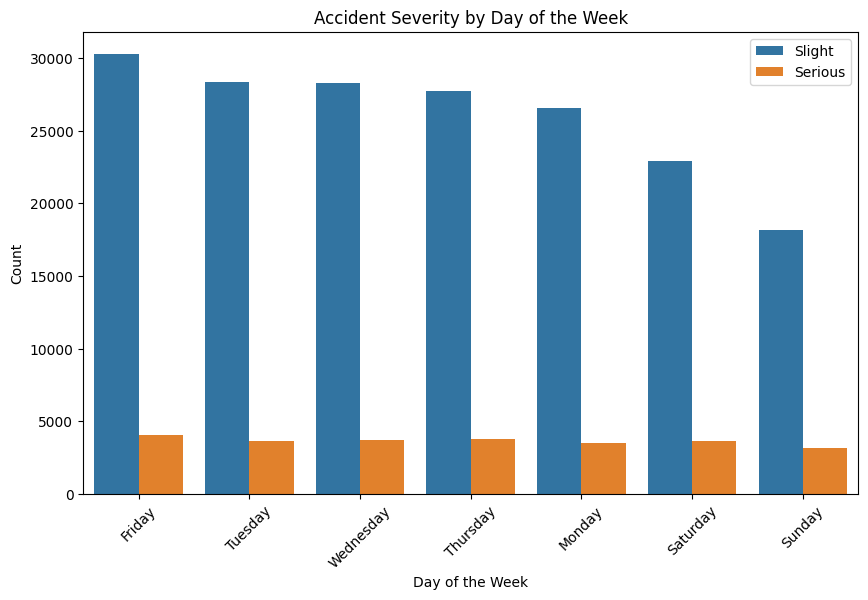

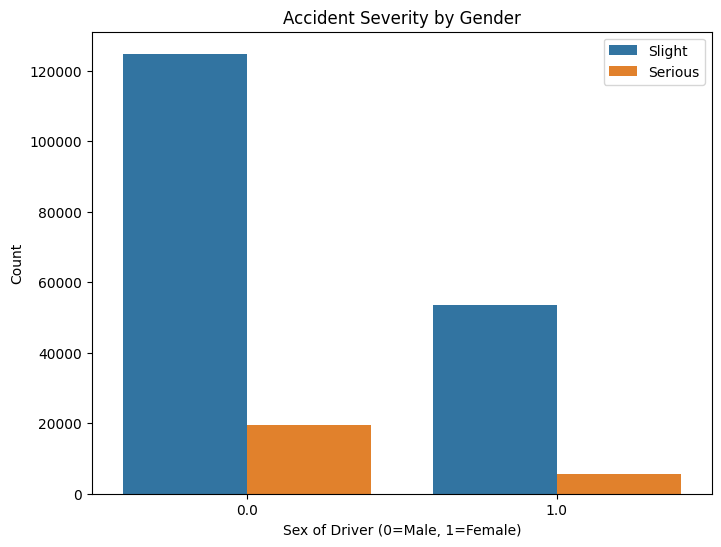

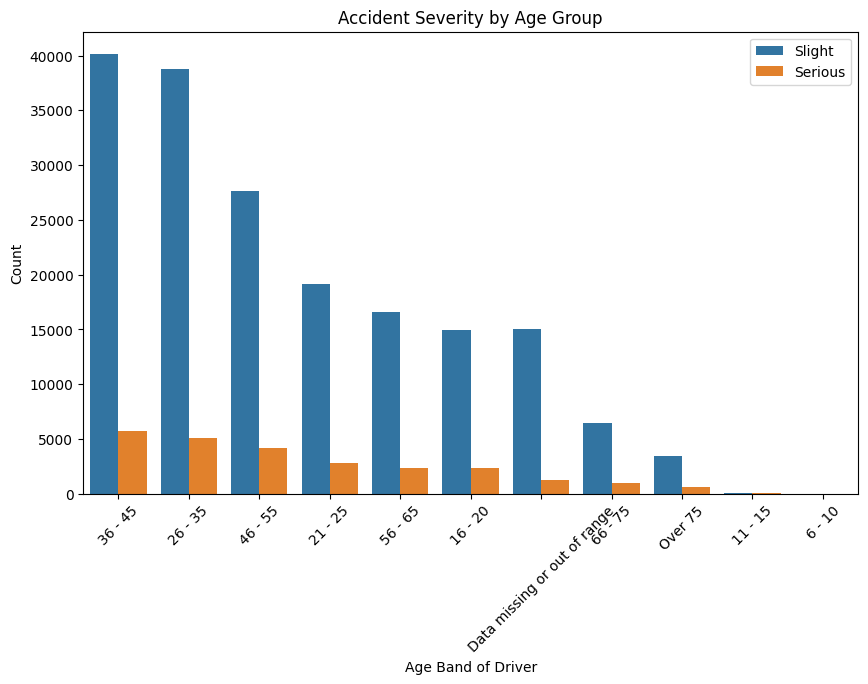

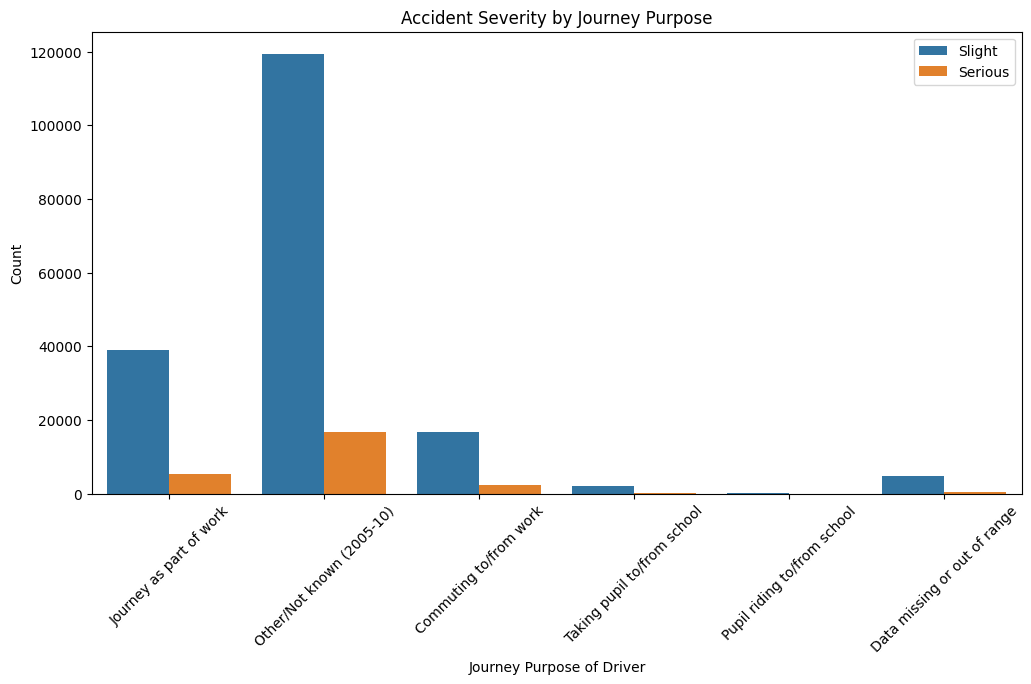

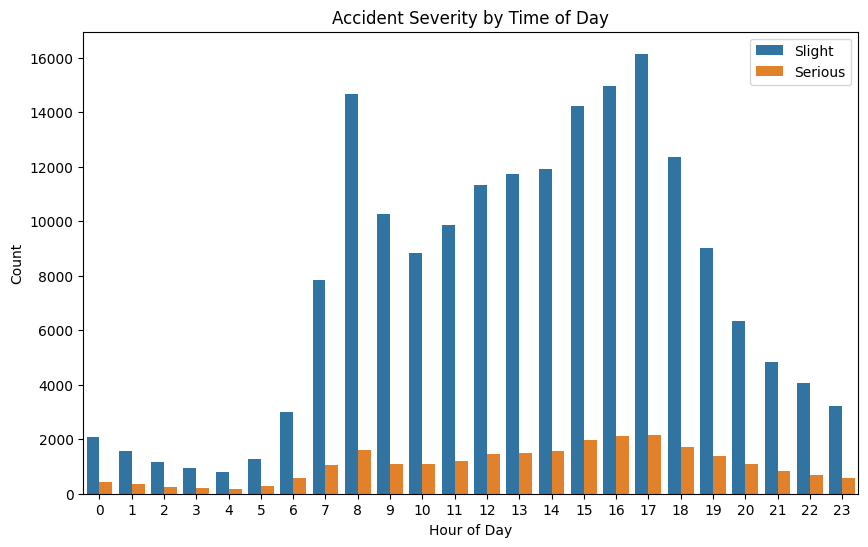

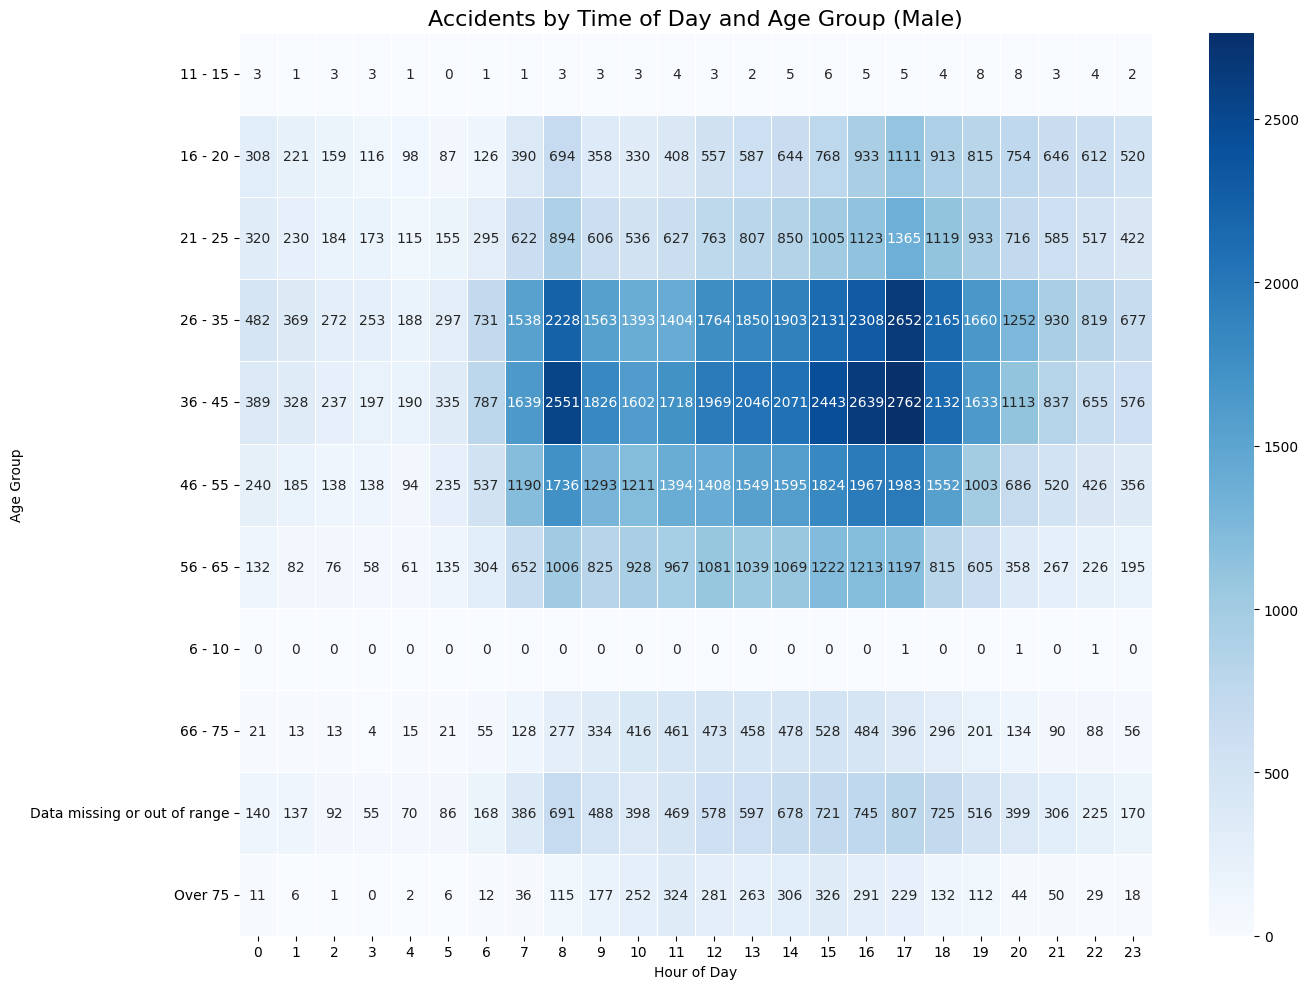

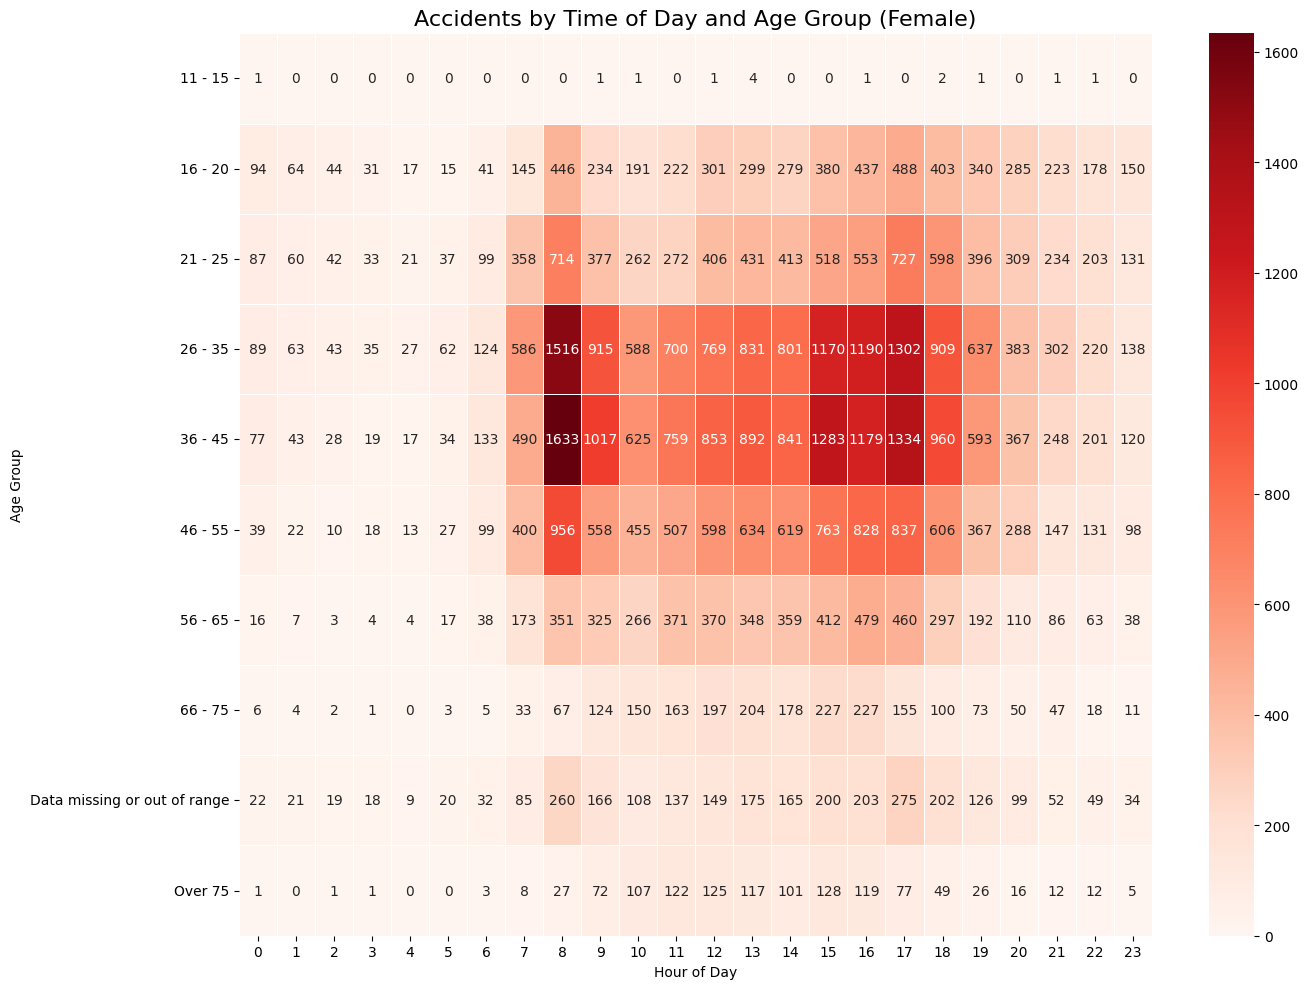

In [3]:
# Driver Demographics: 
# 
# Coloumns Focused : ( Sex_of_Driver, Age_Band_of_Driver, Journey_Purpose_of_Driver )
# Rows Affected : ( Day_of_Week, Time, Accident_Severity )

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the cleaned dataset
cleaned_file = "cleaned_common_accident_vehicle_records.csv"
data = pd.read_csv(cleaned_file)

# Step 2: Filter only the columns relevant to driver demographics
columns_to_keep = [
    'Accident_Severity', 
    'Sex_of_Driver', 
    'Age_Band_of_Driver', 
    'Journey_Purpose_of_Driver', 
    'Day_of_Week', 
    'Date',  # Added Date column to process the year later
    'Time'
]
demographics_data = data[columns_to_keep]

# Step 3: Check for missing values
print("Checking for missing values:")
print(demographics_data.isnull().sum())

# Step 4: Handle missing values by dropping rows with any missing data
demographics_data.dropna(inplace=True)

# Step 5: Check again after dropping rows
print("\nMissing values after dropping:")
print(demographics_data.isnull().sum())

# Step 6: Encode categorical variables
# Encode 'Sex_of_Driver': Male -> 0, Female -> 1
demographics_data['Sex_of_Driver'] = demographics_data['Sex_of_Driver'].map({'Male': 0, 'Female': 1})

# Encode 'Accident_Severity': Slight -> 0, Serious -> 1
demographics_data['Accident_Severity'] = demographics_data['Accident_Severity'].map({'Slight': 0, 'Serious': 1})

# Extract hour from 'Time'
demographics_data['Hour'] = pd.to_datetime(demographics_data['Time'], errors='coerce').dt.hour


# Step 9: Save processed demographics data
demographics_file = "driver_demographics_processed.csv"
demographics_data.to_csv(demographics_file, index=False)
print(f"\nProcessed driver demographics data saved to '{demographics_file}'")

# Step 10: Visualizations

# 1. Gender Distribution (Pie Chart)
plt.figure(figsize=(8, 6))
gender_counts = demographics_data['Sex_of_Driver'].value_counts()
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, colors=['blue', 'pink'])
plt.title('Gender Distribution in Accidents')
plt.axis('equal')
plt.show()


# 3. Accident Severity by Day of Week (Bar Plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_Week', hue='Accident_Severity', data=demographics_data, 
              order=demographics_data['Day_of_Week'].value_counts().index)
plt.title('Accident Severity by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Slight', 'Serious'])
plt.show()

# 1. Accident Severity by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex_of_Driver', hue='Accident_Severity', data=demographics_data)
plt.title('Accident Severity by Gender')
plt.xlabel('Sex of Driver (0=Male, 1=Female)')
plt.ylabel('Count')
plt.legend(['Slight', 'Serious'])
plt.show()

# 2. Accident Severity by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Band_of_Driver', hue='Accident_Severity', data=demographics_data,
              order=demographics_data['Age_Band_of_Driver'].value_counts().index)
plt.title('Accident Severity by Age Group')
plt.xlabel('Age Band of Driver')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Slight', 'Serious'])
plt.show()

# 3. Accident Severity by Journey Purpose
plt.figure(figsize=(12, 6))
sns.countplot(x='Journey_Purpose_of_Driver', hue='Accident_Severity', data=demographics_data)
plt.title('Accident Severity by Journey Purpose')
plt.xlabel('Journey Purpose of Driver')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Slight', 'Serious'])
plt.show()

# 4. Accident Severity by Hour of Day
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', hue='Accident_Severity', data=demographics_data)
plt.title('Accident Severity by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend(['Slight', 'Serious'])
plt.show()


# Step 5: Prepare data for heatmaps
# Create a pivot table for Male
male_data = demographics_data[demographics_data['Sex_of_Driver'] == 0]  # 0 for Male
male_heatmap = male_data.pivot_table(
    index='Age_Band_of_Driver',
    columns='Hour',
    values='Sex_of_Driver',  # Use any column to count rows
    aggfunc='count',
    fill_value=0
)

# Create a pivot table for Female
female_data = demographics_data[demographics_data['Sex_of_Driver'] == 1]  # 1 for Female
female_heatmap = female_data.pivot_table(
    index='Age_Band_of_Driver',
    columns='Hour',
    values='Sex_of_Driver',
    aggfunc='count',
    fill_value=0
)

# Male Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    male_heatmap,
    cmap='Blues',
    annot=True,
    fmt='d',
    linewidths=0.7
)
plt.title('Accidents by Time of Day and Age Group (Male)', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()

# Female Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    female_heatmap,
    cmap='Reds',
    annot=True,
    fmt='d',
    linewidths=0.7
)
plt.title('Accidents by Time of Day and Age Group (Female)', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()




In [4]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Assuming you have already loaded your cleaned data into 'demographics_data'

# Step 1: Preprocess the data into a format suitable for Apriori
# We need to create a transaction-like format for Apriori to work.
demographics_data['Gender'] = demographics_data['Sex_of_Driver'].map({0: 'Male', 1: 'Female'})
demographics_data['Age_Group'] = demographics_data['Age_Band_of_Driver']
demographics_data['Time_of_Day'] = pd.cut(demographics_data['Hour'], bins=[-1, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# Step 2: Convert the categorical data into a one-hot encoded format for Apriori
# Create a DataFrame with one-hot encoding
demographics_data_encoded = pd.get_dummies(demographics_data[['Gender', 'Age_Group', 'Time_of_Day']])

# Step 3: Apply Apriori to find frequent itemsets
frequent_itemsets = apriori(demographics_data_encoded, min_support=0.01, use_colnames=True)

# Step 4: Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0, num_itemsets=2)

# Step 5: Save the association rules to a CSV file
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].to_csv('association_rules.csv', index=False)

print("Association rules have been saved to 'association_rules.csv'.")


Association rules have been saved to 'association_rules.csv'.


C:\Users\acer\AppData\Local\Temp\ipykernel_18912\884354883.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographics_data['Gender'] = demographics_data['Sex_of_Driver'].map({0: 'Male', 1: 'Female'})
C:\Users\acer\AppData\Local\Temp\ipykernel_18912\884354883.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographics_data['Age_Group'] = demographics_data['Age_Band_of_Driver']
C:\Users\acer\AppData\Local\Temp\ipykernel_18912\884354883.py:11: SettingWithCopyWarning: 
A value is trying to be set on

C:\Users\acer\AppData\Local\Temp\ipykernel_18912\2160642624.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Hour'] = pd.to_datetime(data['Time'], errors='coerce').dt.hour


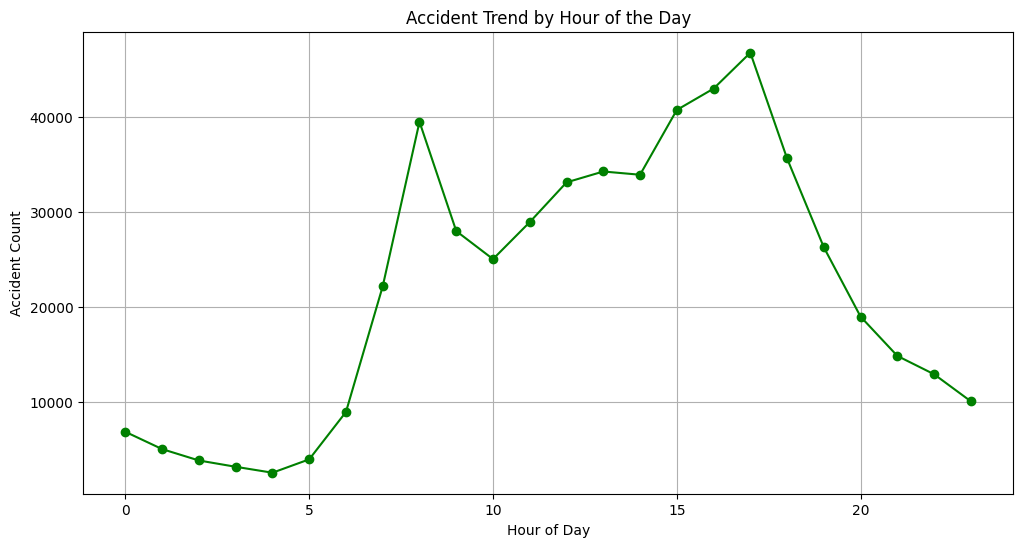

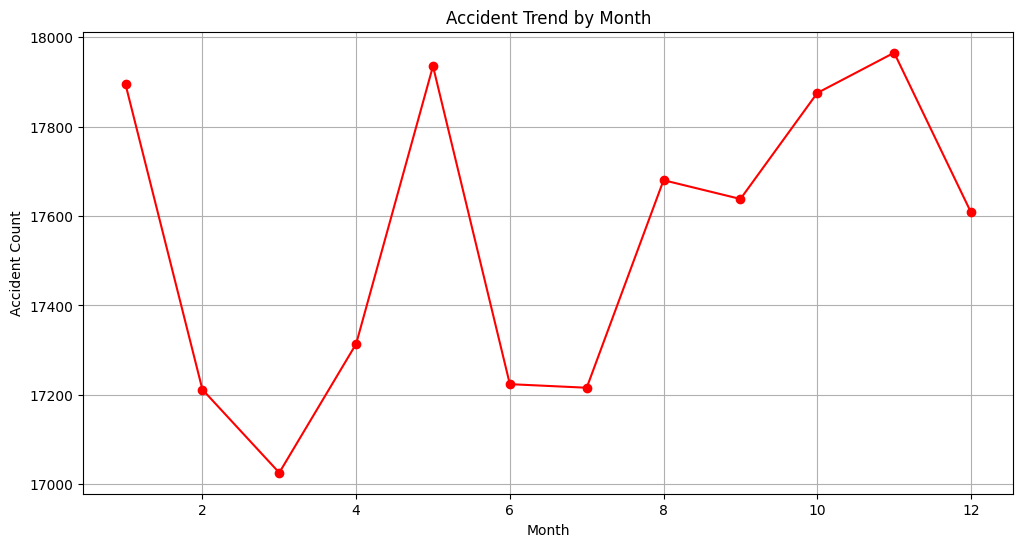

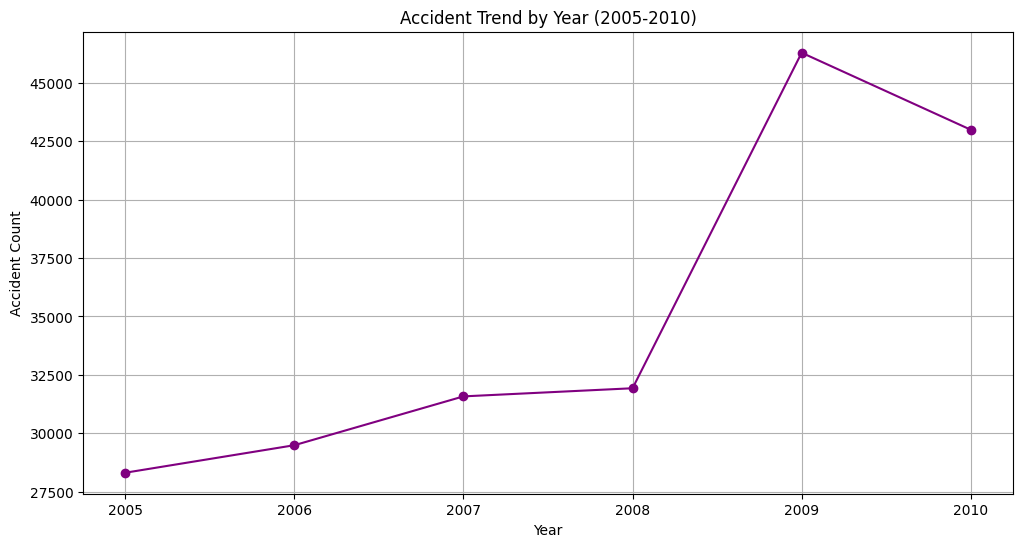

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the cleaned dataset
cleaned_file = "cleaned_common_accident_vehicle_records.csv"
data = pd.read_csv(cleaned_file)

# Step 2: Extract date-related features from 'Date' column
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Convert 'Date' to datetime format
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day_of_Week'] = data['Date'].dt.dayofweek
data['Hour'] = pd.to_datetime(data['Time'], errors='coerce').dt.hour

# Filter data to only include years between 2005 and 2010
data_filtered = data[(data['Year'] >= 2005) & (data['Year'] <= 2010)]

# Step 3: Plot trends for Time and Month

# Trend over Hours of the Day (Accident Count per Hour)
plt.figure(figsize=(12, 6))
hourly_trend = data.groupby('Hour').size()
plt.plot(hourly_trend.index, hourly_trend.values, marker='o', color='green')
plt.title('Accident Trend by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Accident Count')
plt.grid(True)
plt.show()

# Trend over Months (Accident Count per Month)
plt.figure(figsize=(12, 6))
monthly_trend = data.groupby('Month').size()
plt.plot(monthly_trend.index, monthly_trend.values, marker='o', color='red')
plt.title('Accident Trend by Month')
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.grid(True)
plt.show()

# Step 4: Time Series for Years (2005-2010)

# Accident Trend by Year (Accident Count per Year from 2005 to 2010)
plt.figure(figsize=(12, 6))
yearly_trend = data_filtered.groupby('Year').size()
plt.plot(yearly_trend.index, yearly_trend.values, marker='o', color='purple')
plt.title('Accident Trend by Year (2005-2010)')
plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Step 1: Load the cleaned dataset
cleaned_file = "cleaned_common_accident_vehicle_records.csv"
data = pd.read_csv(cleaned_file)

# Step 2: Extract date-related features from 'Date' column
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Convert 'Date' to datetime format
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Filter data to only include years between 2005 and 2009 for training
data_filtered = data[(data['Year'] >= 2005) & (data['Year'] <= 2009)]

# Step 3: Prepare the features and target for regression (Year vs Accident Count)
# Group accidents by Year and count the number of accidents per year
yearly_accidents = data_filtered.groupby('Year').size()

# Reshape the data for regression model
X = yearly_accidents.index.values.reshape(-1, 1)  # Years (2005 to 2009)
y = yearly_accidents.values  # Accident counts for the corresponding years

# Step 4: Train a linear regression model on the data from 2005-2009
model = LinearRegression()
model.fit(X, y)

# Step 5: Predict the accident count for 2010
predicted_2010 = model.predict(np.array([[2010]]))  # Predict for year 2010

# Step 6: Calculate the actual accident count for 2010 (for error calculation)
# Filter data for 2010
actual_2010 = data[data['Year'] == 2010].shape[0]

# Step 7: Calculate the error (e.g., Mean Absolute Error) for the prediction
error = abs(predicted_2010[0] - actual_2010)

# Step 8: Print out the results
print(f"Predicted accident count for 2010: {predicted_2010[0]}")
print(f"Actual accident count for 2010: {actual_2010}")
print(f"Absolute error in prediction: {error}")

# Step 9: Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(yearly_accidents.index, yearly_accidents.values, color='blue', label='Actual Data')
plt.plot(yearly_accidents.index, model.predict(X), color='red', label='Regression Line')
plt.scatter(2010, predicted_2010, color='green', label='Prediction for 2010')
plt.title('Accident Trend and Prediction for 2010')
plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.legend()
plt.grid(True)
plt.show()
